Task 3 : Website Traffic Analysis Program

Loading data from: traffic.csv

Initial Data Overview:
Number of records: 226278
Number of columns: 9

First 5 rows:
   event        date       country      city  \
0  click  2021-08-21  Saudi Arabia    Jeddah   
1  click  2021-08-21  Saudi Arabia    Jeddah   
2  click  2021-08-21         India  Ludhiana   
3  click  2021-08-21        France   Unknown   
4  click  2021-08-21      Maldives      Malé   

                              artist          album          track  \
0                             Tesher    Jalebi Baby    Jalebi Baby   
1                             Tesher    Jalebi Baby    Jalebi Baby   
2                      Reyanna Maria      So Pretty      So Pretty   
3  Simone & Simaria, Sebastian Yatra  No Llores Más  No Llores Más   
4                             Tesher    Jalebi Baby    Jalebi Baby   

           isrc                                linkid  
0  QZNWQ2070741  2d896d31-97b6-4869-967b-1c5fb9cd4bb8  
1  QZNWQ2070741  2

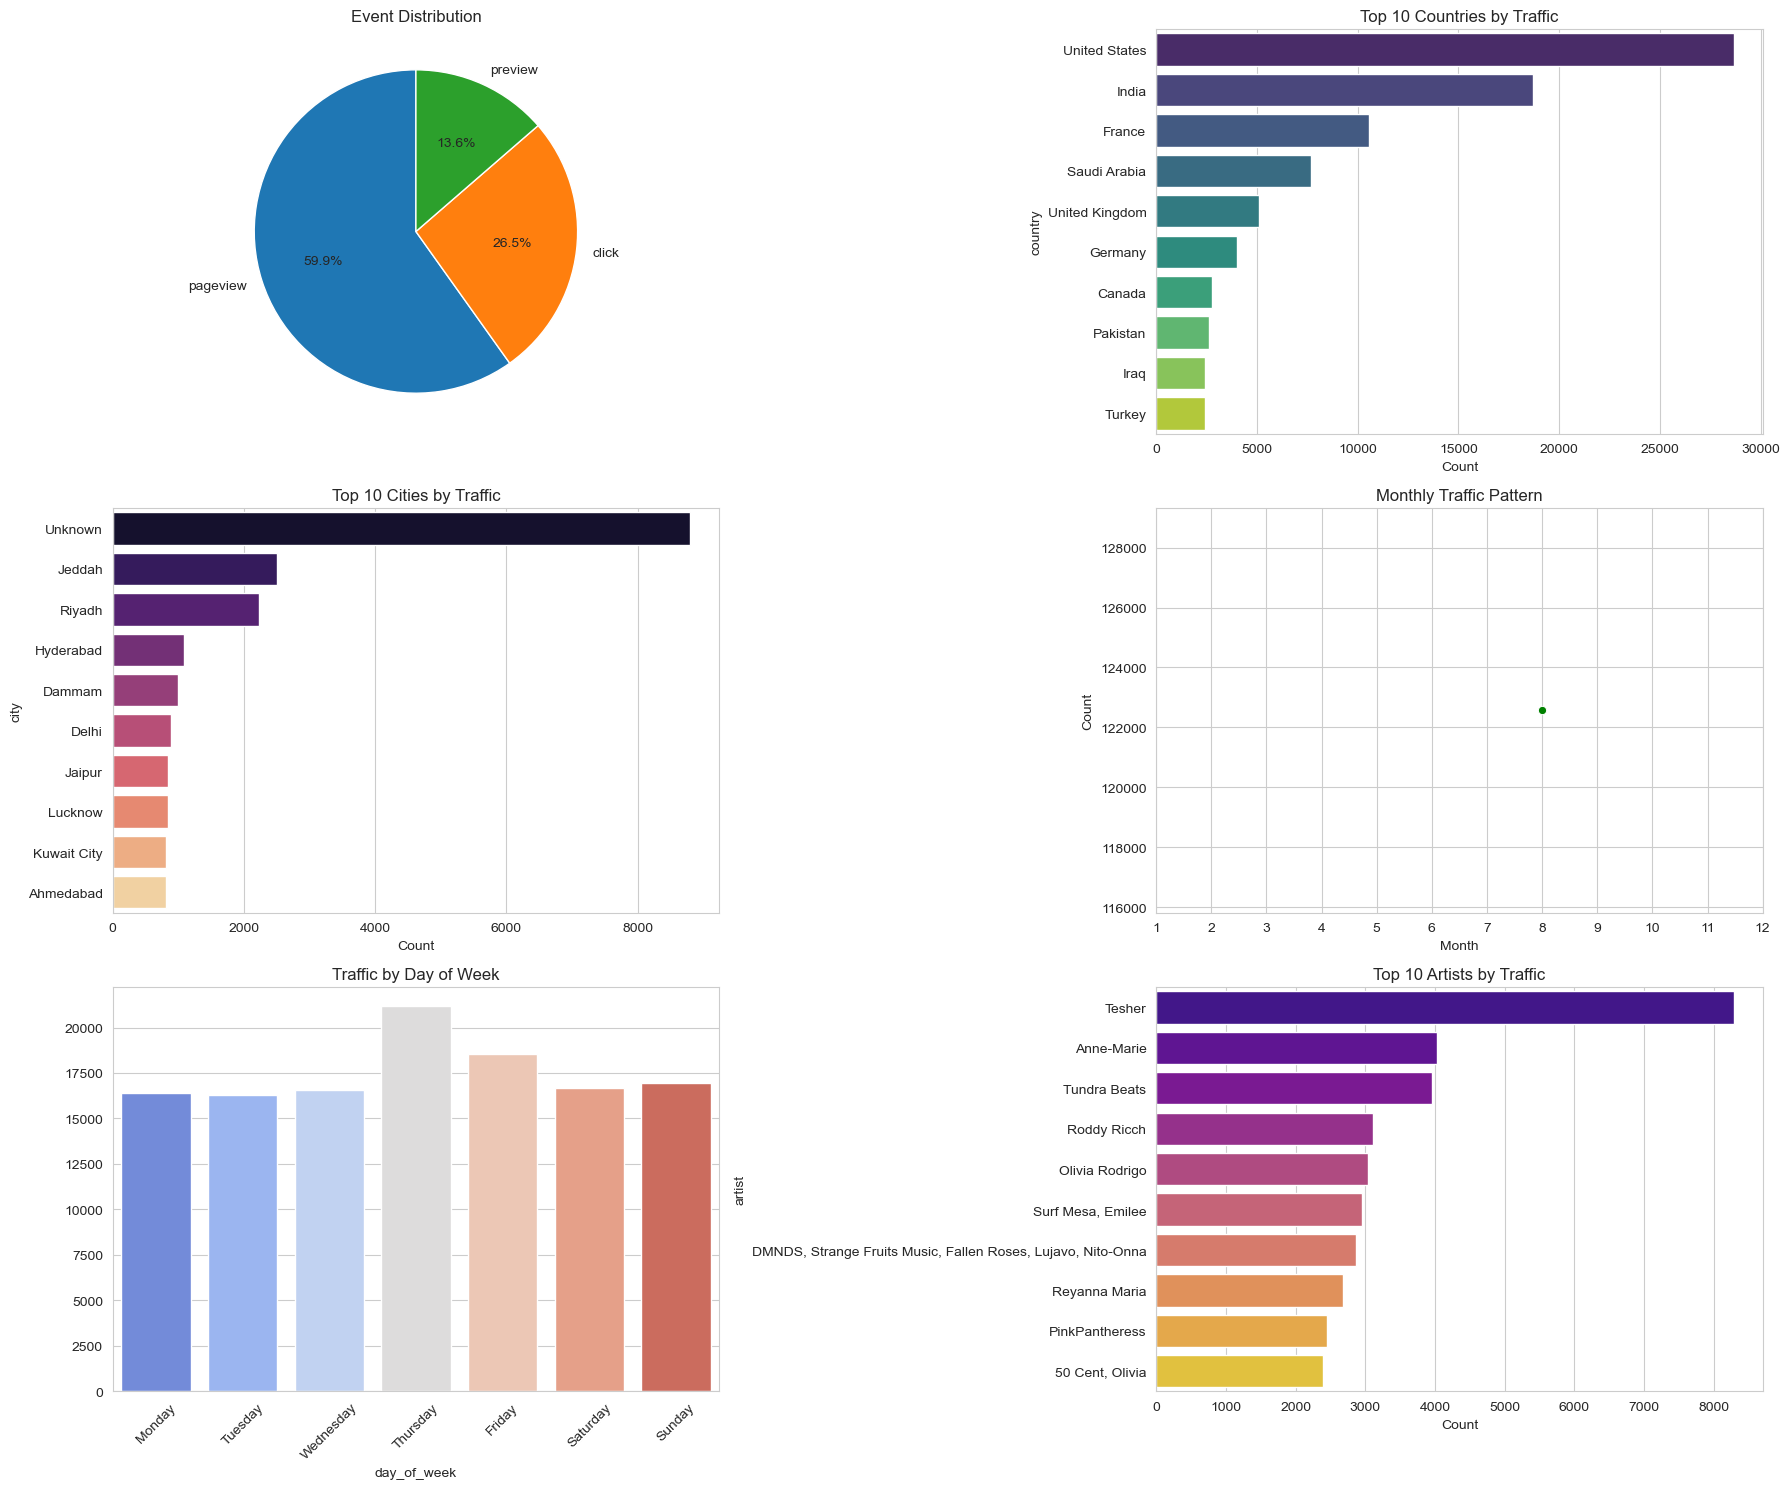

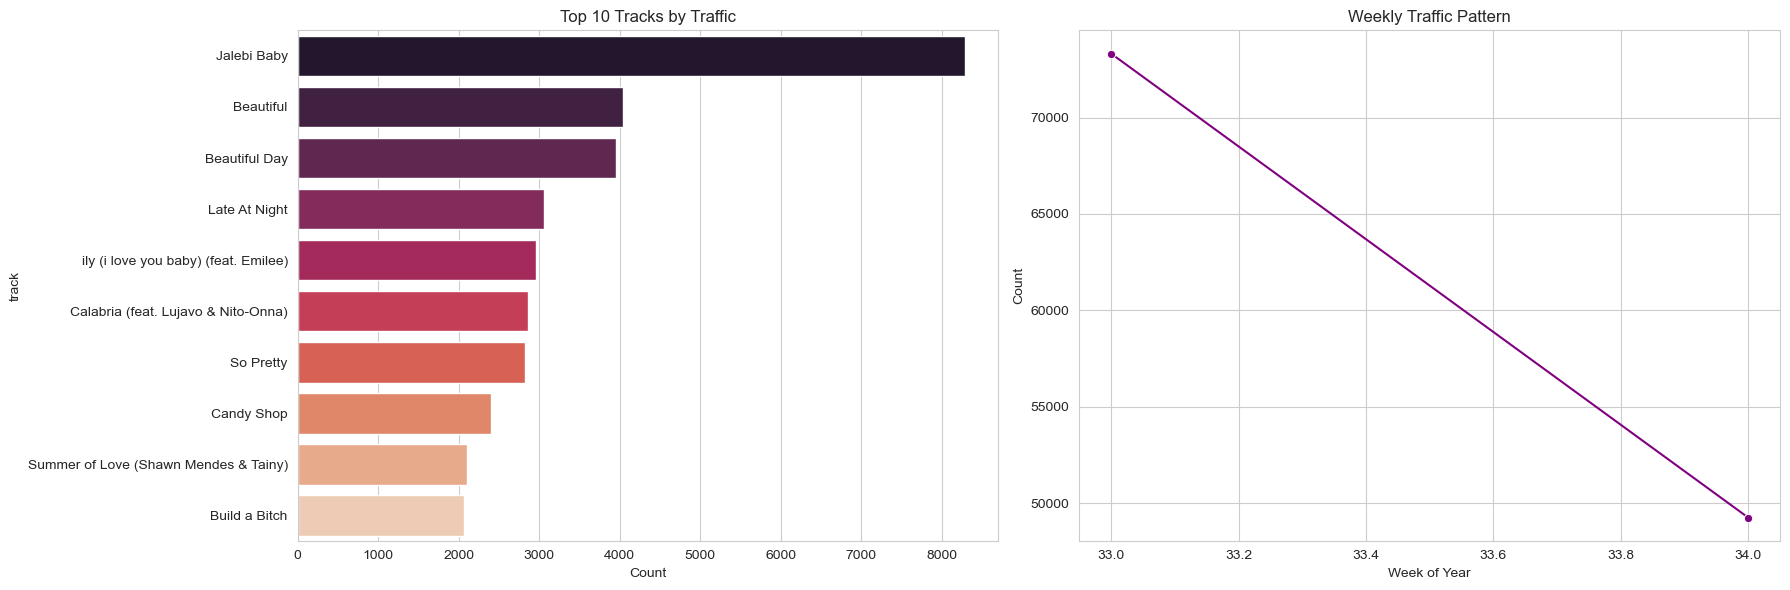


Analysis completed successfully!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
def load_and_preprocess_data(filepath="traffic.csv"):
    try:
        df = pd.read_csv(filepath)
        print("\nInitial Data Overview:")
        print("====================================")
        print(f"Number of records: {len(df)}")
        print(f"Number of columns: {len(df.columns)}")
        print("\nFirst 5 rows:")
        print(df.head())
        print("\nData Cleaning and Preprocessing:")
        print("====================================")
        print("\nMissing Values Before Cleaning:")
        print(df.isnull().sum())
        df = df.assign(city=df['city'].fillna('Unknown'))
        df['country'] = df['country'].str.replace(r'Ã¡', 'a', regex=True)
        df['country'] = df['country'].str.replace(r'Ã©', 'e', regex=True)
        df['city'] = df['city'].str.replace(r'Ã¡', 'a', regex=True)
        df['city'] = df['city'].str.replace(r'Ã©', 'e', regex=True)
        df['city'] = df['city'].str.replace(r'Ã', 'i', regex=True)
        try:
            df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
        except ValueError:
            try:
                df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
            except ValueError:
                df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
        df['year'] = df['date'].dt.year
        df['month'] = df['date'].dt.month
        df['day'] = df['date'].dt.day
        df['day_of_week'] = df['date'].dt.day_name()
        df['week_of_year'] = df['date'].dt.isocalendar().week
        df['artist'] = df['artist'].str.replace(r'Ã¡', 'a', regex=True)
        df['artist'] = df['artist'].str.replace(r'Ã©', 'e', regex=True)
        df['artist'] = df['artist'].str.replace(r'Ã', 'i', regex=True)
        print(f"\nNumber of duplicates: {df.duplicated().sum()}")
        df = df.drop_duplicates()
        print("\nMissing Values After Cleaning:")
        print(df.isnull().sum())
        print("\nData Types:")
        print(df.dtypes)
        return df
        
    except Exception as e:
        print(f"\nError loading or processing data: {str(e)}")
        return None
        
def perform_eda(df):
    print("\nExploratory Data Analysis (EDA):")
    print("====================================")
    print("\nBasic Statistics:")
    print(df.describe(include='all'))
    print("\nEvent Distribution:")
    print(df['event'].value_counts())
    print("\nTop 10 Countries by Traffic:")
    print(df['country'].value_counts().head(10))
    print("\nTop 10 Cities by Traffic:")
    print(df['city'].value_counts().head(10))
    print("\nTop 10 Artists by Traffic:")
    print(df['artist'].value_counts().head(10))
    print("\nTop 10 Tracks by Traffic:")
    print(df['track'].value_counts().head(10))
    print("\nTemporal Analysis - Traffic by Month:")
    print(df.groupby('month')['event'].count())
    print("\nTemporal Analysis - Traffic by Day of Week:")
    print(df.groupby('day_of_week')['event'].count())
    
def visualize_data(df):
    print("\nData Visualization:")
    print("====================================")
    sns.set_style("whitegrid")
    plt.figure(figsize=(18, 15))
    plt.subplot(3, 2, 1)
    
    event_counts = df['event'].value_counts()
    plt.pie(event_counts, labels=event_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Event Distribution')
    plt.subplot(3, 2, 2)
    
    top_countries = df['country'].value_counts().head(10)
    sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
    plt.title('Top 10 Countries by Traffic')
    plt.xlabel('Count')
    plt.subplot(3, 2, 3)
    
    top_cities = df['city'].value_counts().head(10)
    sns.barplot(x=top_cities.values, y=top_cities.index, palette="magma")
    plt.title('Top 10 Cities by Traffic')
    plt.xlabel('Count')
    plt.subplot(3, 2, 4)
    
    monthly_traffic = df.groupby('month')['event'].count()
    sns.lineplot(x=monthly_traffic.index, y=monthly_traffic.values, marker='o', color='green')
    plt.title('Monthly Traffic Pattern')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.xticks(range(1, 13))
    plt.subplot(3, 2, 5)
    
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    daily_traffic = df['day_of_week'].value_counts().reindex(day_order)
    sns.barplot(x=daily_traffic.index, y=daily_traffic.values, palette="coolwarm")
    plt.title('Traffic by Day of Week')
    plt.xticks(rotation=45)
    plt.subplot(3, 2, 6)
    
    top_artists = df['artist'].value_counts().head(10)
    sns.barplot(x=top_artists.values, y=top_artists.index, palette="plasma")
    plt.title('Top 10 Artists by Traffic')
    plt.xlabel('Count')
    plt.tight_layout()
    plt.show()
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 2, 1)
    
    top_tracks = df['track'].value_counts().head(10)
    sns.barplot(x=top_tracks.values, y=top_tracks.index, palette="rocket")
    plt.title('Top 10 Tracks by Traffic')
    plt.xlabel('Count')
    plt.subplot(1, 2, 2)
    
    weekly_traffic = df.groupby('week_of_year')['event'].count()
    sns.lineplot(x=weekly_traffic.index, y=weekly_traffic.values, marker='o', color='purple')
    plt.title('Weekly Traffic Pattern')
    plt.xlabel('Week of Year')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
    
def main():
    print("Task 3 : Website Traffic Analysis Program")
    print("====================================\n")
    filepath = "traffic.csv"
    if not os.path.exists(filepath):
        print(f"Error: File '{filepath}' not found in the current directory.")
        print("Please make sure the file exists or provide the full path.")
        return
        
    print(f"Loading data from: {filepath}")
    df = load_and_preprocess_data(filepath)
    if df is not None:
        perform_eda(df)
        visualize_data(df)
        print("\n  Website Traffic Analysis completed successfully!")
    else:
        print("Failed to complete analysis due to data loading issues.")
if __name__ == "__main__":
    main()